# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [3]:
import pandas as pd
import torch

print("Hello World!")


Hello World!


In [4]:
#hide
import fastbook
fastbook.setup_book()

In [5]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [6]:
path = untar_data(URLs.MNIST_SAMPLE)   #download a sample of MNIST that contains images of just these digits

In [7]:
# hide
Path.BASE_PATH = path #.表示当前路径，这里把path赋值给当前路径

In [8]:
path.ls()    # 列出文件夹内容，返回L 类 的对象

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

In [9]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [10]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png'),Path('train/3/10093.png'),Path('train/3/10097.png'),Path('train/3/10099.png'),Path('train/3/10116.png'),Path('train/3/10125.png'),Path('train/3/10137.png'),Path('train/3/10141.png'),Path('train/3/10144.png'),Path('train/3/10155.png'),Path('train/3/10161.png')...]

In [11]:
im3_path = threes[1]
im3 = Image.open(im3_path)  # Image 类 来自 Python Imaging Library(PIL)
im3

In [12]:
array(im3)[4:10,4:10]  # 观察组成图片的数字，我们把它转化成numpy array 或者 pytorch tensor。

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [13]:
tensor(im3)[4:10,4:10] #we requested the rows from index 4 (included) to 10 (not included) and the same for the columns

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [14]:
# 切片选择 hide_output
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


my guess: 电脑如何区分3或者7呢？3中间会向中心弯曲，7不会，计算中心像素点的位置，计算下面的位置是向左还是向右。向左是3，向右是7.

Baseline: 第一个猜想，计算3的像素平均值，7的像素平均值。
关于基线：一个简单易行的模型，还有一个方法是寻找其他解决相似问题人的模型
------
列表和字典都有推导，包含3个部分，迭代的集合或列表，过滤器，还有函数（每个元素都有关的）new_list=[f(o) for o in a_list if o>0]

In [15]:
# 首先用列表推到创建单个图像张量列表
# In a computer, everything is represented as a number. To view the numbers that make up this image, we have to convert it to a NumPy array or a PyTorch tensor
# 类型名称：PIL.Image.Image，包含图像像素数据、尺寸、模式（如 RGB、灰度）等信息
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)


(6131, 6265)

<Axes: >

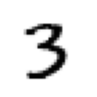

In [16]:
# tensor , jupyter 默认打印数值，而PIL image，jupyter默认打印图片,使用fastai 的show_image可以打印图片
show_image(three_tensors[1])

计算平均值，吧素有的图片存储到single three-dimensional tensor，最常见的是秩3张
不出意外，PyTorch 有一个stack 可以达成目的。PyTorch 处理平均值，需要转变类型为 float types
当图片是float类型，像素通常预期在0-1之间，所以我们这里除以255.

In [17]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [18]:
len(stacked_threes.shape)

3

秩（rank）：指张量的轴（axis）数量或维度数量，是描述张量维度数的明确术语。
------
形状（shape）：指张量每个轴的尺寸大小，例如形状为(3, 4)的张量表示有 2 个轴，第一个轴长度为 3，第二个轴长度为 4。
------
rank 和 shape。如秩 1 张量表示向量，秩 2 表示矩阵，秩 3 表示三维数组等

In [19]:
stacked_threes.ndim  # 获取张量的秩

3

<Axes: >

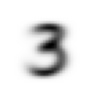

In [20]:
mean3 = stacked_threes.mean(0)   # 计算每个位置像素的平均值，形成一个理想的图片
show_image(mean3)

<Axes: >

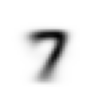

In [21]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

你会如何计算一个图片和理想图片的差值。计算每个像素位置的值与理想的差值，计算平方差。
- 不能直接相加，有些差值正的，有些差值负的，会抵消。
- 数据科学家使用两种方法，1 计算绝对值相加，求平均。绝对值误差又叫L1 norm。
- 2、计算差值平方的均值，还要开平方，这叫 RMSE 或 L2 norm。均方根误差。


<Axes: >

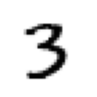

In [22]:
a_3 = stacked_threes[1]   # 举例
show_image(a_3)

In [23]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt_()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [24]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt_()
dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

- l1 refers to the standard mathematical jargon for mean absolute value(in math it's called the L1 norm)。
平均绝对差
- 均方差 mse

In [25]:
    F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3, mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

NumPy Arrays and PyTorch Tensors
----

NumPy与PyTorch非常相似，但是它不支持GPU和计算梯度，这两者对机器学习非常重要。所以我们使用PyTorch tensors 而不是 Numpy Arrays.

NumPy arrays and PyTorch tensors can finish computations many thousands of times faster than using pure Python.

NumPy 数组是一个多维数据表，其中所有项目都属于同一类型。然而，限制在于张量不能使用任何旧类型——它必须对所有组件使用单一基本数字类型。

例如，PyTorch 张量不能是锯齿状的。它始终是一个规则形状的多维矩形结构。
PyTorch可以使用GPU,并针对GPU优化，运行的更快
此外，PyTorch 可以自动计算这些运算的导数，包括运算的组合。正如你所见，如果没有这项功能，深度学习在实践中将无法实现。

* 减少写循环，使用arrays或 tensors，这样能加快python 运行速度
* 对于 Python 程序员来说，最重要的新编码技能可能是如何有效地使用数组/张量 API。


序列（sequence) 是列表(list) 和数组( array) 的统称

In [26]:
![](array.png)

zsh:1: number expected


In [27]:
data=[[1,2,3],[4,5,6]]
arr=array(data)
tns=tensor(data)


In [28]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [29]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [30]:
tns[1]

tensor([4, 5, 6])

In [31]:
tns[:,1]

tensor([2, 5])

In [32]:
tns[1,1:3]

tensor([5, 6])

In [33]:
tns.type()

'torch.LongTensor'

In [34]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [35]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

#### 使用广播机制(Broadcasting)计算指标(Metrics)

1、指标的本质：
    指标是基于模型预测与数据集真实标签计算的数值，用于衡量模型性能。
2、常见指标类型：
   - 回归任务：均方误差（MSE）、平均绝对误差（MAE）；
   - 分类任务：准确率（更易理解，实际应用中常用）。

In [36]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [37]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2)) # mean((-1, -2)) 中的 (-1, -2) 是一个元组，表示 “同时对维度 1 和维度 2 求均值”
mnist_distance(a_3,mean3)

tensor(0.1114)

利用广播机制，进行图片之间的计算
返回的是一个向量，包含每个图片与理想图片的距离

PyTorch 在两个张量运算时，把小秩扩展成大秩。

mnist_distance:It applies the method to each individual element in the tensor, and returns a tensor of the results

In [38]:
valid_3_dist = mnist_distance(valid_3_tens,mean3) # 原著解读了一切
valid_3_dist, valid_3_dist.shape

(tensor([0.1634, 0.1145, 0.1363,  ..., 0.1105, 0.1111, 0.1640]),
 torch.Size([1010]))

In [39]:
a_3 - mean3

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -7.2918e-05, -1.9637e-04, -2.3410e-04, -1.9253e-04,
         -2.7568e-04, -2.6161e-04, -2.9423e

In [40]:
[1,2,3]+[1]    # 加可以，减不行

[1, 2, 3, 1]

In [41]:
tensor([1,2,3])+tensor([1])

tensor([2, 3, 4])

In [42]:
(valid_3_tens-mean3).shape

torch.Size([1010, 28, 28])

In [43]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [44]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

看起来很不错，我们的验证集3的精确度达到0.9168,7达到0.9854 ，平均值有 0.9511

#### 而且我们学会了如何使用广播来更方便/快速的计算指标 metric

In [45]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1-is_3(valid_7_tens).float()).mean()
accuracy_3s , accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

(接下来，让我们优化，自助修改以提升性能，让我们讨论训练过程以及SGD

# Stochastic Gradient Descent(SGD

在上面的公式，我们用到权重，也就无法自动更新优化，接下来我们需要一些赋值权重。
def pr_eight(x,w): return (x*w).sum() 假设有这么一个公式，x是图片，w是权重。

更准确的，我们要做的：
1. 初始化权重
2. 对于每个图片，使用权重预测它是3或7
3. 基于这些预测，计算模型的好坏(its loss)
4. 计算梯度，也就是权重变化改变损失的衡量
5. step,根据计算结果改变权重，
6. 回到步骤2，重复
7. 迭代直到你决定停止训练过程（比如，模型足够好了，或者你不想浪费时间了）

<img src="array.png" width="280" height="auto" alt="数组图片">

In [46]:
def f(x): return x**2


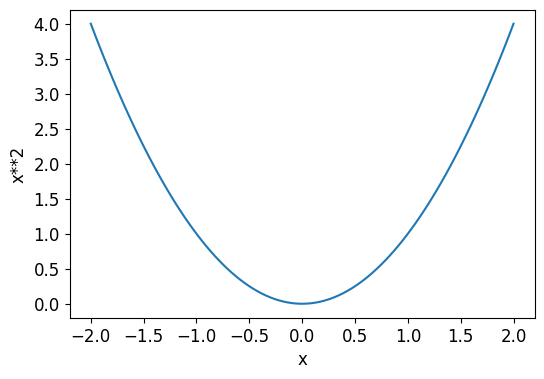

In [47]:
plot_function(f,'x','x**2')

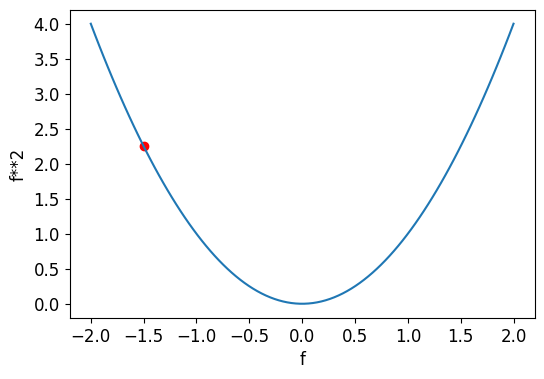

In [48]:
plot_function(f,'f','f**2')
plt.scatter(-1.5, f(-1.5), color='red')

## Calsulating Gradients
函数的导数表示参数变化会导致结果变化的幅度
当然在PyTorch里面也有能自动计算任何函数的导数


关键的一步在于我们计算梯度的环节。正如我们提到的，我们将微积分用作一种性能优化手段；它让我们能够更快速地判断，当我们上调或下调参数时，损失（loss）会如何变化。换句话说，梯度会告诉我们，为了让模型表现更优，每个权重需要改变多少。基于梯度调整参数值是机器学习的重要组成部份，几乎所有方法都始于将梯度乘以某个小数的基本思想，这个小数称为学习率（LR）。学习率通常是 0.001 到 0.1 之间的数字，尽管它可以是任何数字


关于导数，关键要点是这样的：对于任意函数，比如我们在前一部分看到的二次函数，我们都能计算它的导数。导数本身也是一个函数。它计算的是变化量，而非函数值。例如，二次函数在取值为 3 处的导数，会告诉我们函数在值为 3 时的变化速率有多快。更具体地说，你可能记得梯度的定义是 “上升量 / 移动量”，也就是函数值的变化量除以参数值的变化量。<font color=Blue>**当我们知道函数会如何变化时，我们就知道需要做些什么来让它（函数值，这里指损失等）变小。这就是机器学习的关键：有一种改变函数参数以使函数值变小的方法。微积分为我们提供了一个计算捷径，也就是导数，它让我们可以直接计算函数的梯度。**</font>

In [49]:
xt = tensor(3.).requires_grad_()
yt=f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

不支持浮点运算，梯度计算可能出错

In [50]:
xt.grad

In [51]:
xt = tensor([3.,4.,10.], requires_grad=True)

In [52]:
def f(x): return (x**2).sum()
yt=f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [53]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

梯度告诉我们函数的坡度，但是不能告诉我们如何调整参数。如果slope非常大，我们需要调整多，坡度小，我们调整的少

### Stepping with a learning rate

基于梯度值改变参数值，是深度学习重要的部分。有公式如下： w -= gradient(w) * lr

这被称为通过优化器步骤来更新参数。请注意，我们从参数中减去梯度乘以学习率（gradient * lr）来更新它。这使我们能够根据斜率的方向调整参数：当斜率为负时增加参数，当斜率为正时减少参数。我们希望沿着斜率的方向调整参数，因为深度学习的目标是最小化损失。

### An End-to-End SGD Example

In [56]:
time = torch.arange(0,20).float()  # 创建0-20的浮点型张量

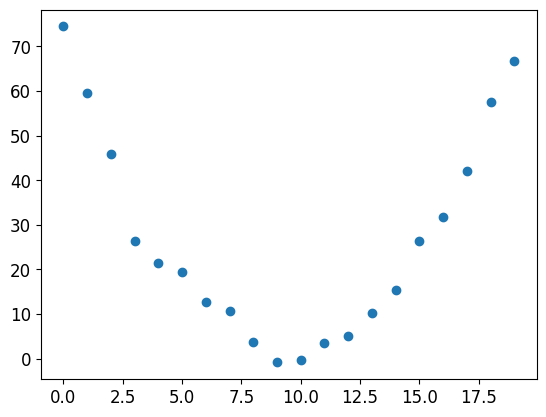

In [57]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 +1
plt.scatter(time, speed)

1. 添加随机噪声：
- torch.randn(20)*3 会将标准正态分布的随机数放大 3 倍（均值变为 0，标准差变为 3），作为数据中的 “噪声”。
- 这模拟了真实场景中测量误差或不可控因素的影响（如手动测量过山车速度时的精度不足）。
2. 构造模拟数据：
- 完整公式 0.75*(time-9.5)² + 1 是二次函数主体（对应前文提到的二次函数假设），表示过山车速度的 “理论值”。
- 加上噪声后，speed 成为带噪声的观测数据，用于后续用 SGD 拟合函数。

In [54]:
def f(t,params):
    a,b,c = params
    return a*(t**2) + (b*t) +c

我们需要首先定义 “最优” 的含义。这可以通过选择一个损失函数来精确界定：损失函数会根据预测值和目标值返回一个值，函数值越低表示预测 “越好”。当预测越准确时，损失函数返回的值越低，这一点很重要，因为我们之前定义的随机梯度下降（SGD）过程会尝试最小化这个损失。对于连续数据，常用的损失函数是均方误差（MSE）：

In [55]:
def mse(preds, targets): return ((preds - targets)**2).mean()

聚焦参数而非函数
在 PyTorch 中，梯度计算的核心流程是：
① 标记参数（如 x.requires_grad_()）；
② 计算函数值（如 y = f(x)）；
③ 反向传播得到参数在该点的梯度值（如 x.grad）。
与数学的差异：数学中求导的对象是函数（如 f'(x)），而 PyTorch 中求导的对象是参数的具体取值（如 “x=3 时的梯度”）。

### 7步走开始
### Step 1: Initialize the parameters

In [58]:
params = torch.randn(3).requires_grad_()

In [59]:
# hide
orig_params = params.clone()

## Step 2 : Calculate the predictions

In [60]:
preds = f(time,params)

In [63]:
def show_preds(preds,ax=None):
    if ax is None: ax = plt.subplot()
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

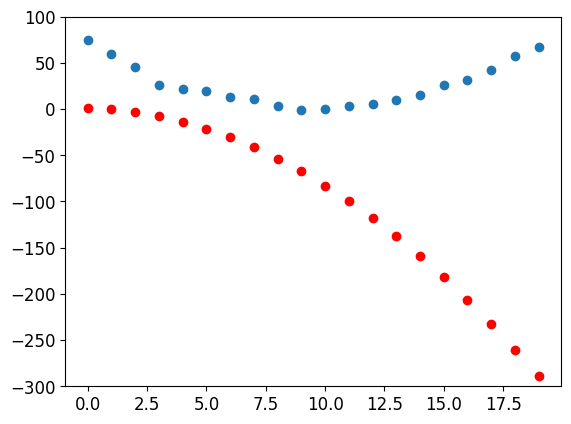

In [64]:
show_preds(preds)

### Calculate the loss

In [65]:
loss = mse(preds, speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

Our goal is now to improve this. To do that, we'll need to know the gradients

### Step 4: Calculate the gradients

下一步是计算梯度。换句话说，计算参数如何改变的近似

In [66]:
loss.backward()
params.grad

tensor([-53195.8594,  -3419.7146,   -253.8908])

In [68]:
params.grad * 1e-5

tensor([-0.5320, -0.0342, -0.0025])

我们使用这些梯度提升我们的参数，我们需要选择一个学习率，假设是1e-5 , 0.00001

In [70]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

### Step 5: Step the weights
Now we need to update the parameters based on the gradients we just calculated:

In [71]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

理解这点基于记住最近的历史。计算梯度我们在损失上调用backward。但是这个损失本身被mse 计算，采取pres 作为输入，作为f的参数计算，也就是我们开始乘坐requires_grad_。初始的时候，我们调用backward在损失上。

let's see if the loss has improved

In [72]:
preds = f(time,params)
mse(preds, speed)

tensor(5435.5371, grad_fn=<MeanBackward0>)

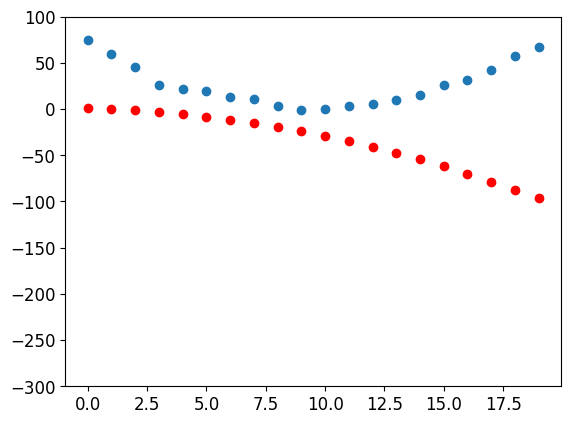

In [74]:
show_preds(preds)

In [75]:
# 重复上述过程
def apply_step(params, prn=True):
    preds = f(time,params)
    loss=mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

### Step 6: Repeat the process

接下来我们迭代。通过循环和实施许多提升，我们希望获得一个好的结果

In [76]:
for i in range(10): apply_step(params)

5435.537109375
1577.449462890625
847.3779296875
709.2225952148438
683.0758056640625
678.1244506835938
677.1838989257812
677.0023193359375
676.9644775390625
676.9537353515625


In [77]:
# hide
params = orig_params.detach().requires_grad_() #创建一个与原张量共享数据但独立于计算图的新张量，并重新启用梯度计算。

1. 迭代的本质
- 每次 SGD 迭代都会更新参数（a、b、c），从而生成一个新的二次函数 f(t) = a·t² + b·t + c。
- 损失下降的过程，本质是函数形状从 “随机初始状态” 逐步调整到 “贴合数据分布” 的过程。
2. 可视化的意义
- 损失数值只能体现 “优化程度”，而函数图像能直观展示 “拟合效果”：
  - 初始阶段：函数可能与真实数据（带噪声的二次曲线）差异很大；
  - 迭代后期：函数曲线逐渐贴近数据点，体现参数优化的实际效果。
3. 从数值到图像的认知升级
- 当处理神经网络等复杂模型时，可视化（如特征图、损失曲线）是理解模型行为的关键工具，能帮助发现过拟合、欠拟合等问题。

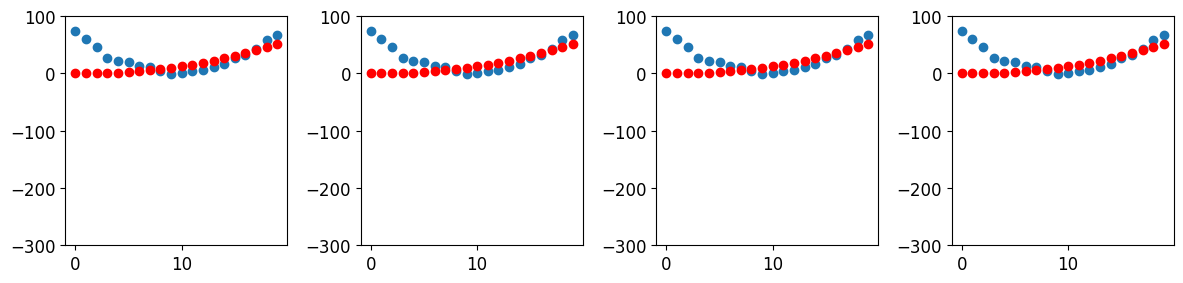

In [81]:
_, axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params,False),ax)
plt.tight_layout()

### Step 7: stop
我们随意决定在10个回合后结束。实际上，需要训练和验证损失以及我们的指标决定什么时候停止。

<img src="sevenStep.png" width="5800" height="auto" alt="7步图片">

换种表达，1 初始化参数，2 定义模型和损失函数 3 前向传播计算损失 4 反向传播计算梯度 5 梯度下降更新参数 6 迭代至收敛

1. 权重初始化策略
- 随机初始化：适用于无先验知识的场景，但初期预测可能完全随机；
- 迁移学习：利用预训练模型的权重作为起点，适用于目标任务数据量少或与预训练任务相关的场景。
2. 损失函数的核心作用
- 作为 “优化指南针”，将预测误差量化为可计算的数值，指导权重更新方向。
3. 梯度下降的类比本质
- 梯度：指示损失增长最快的方向（上坡方向），因此参数更新沿梯度反方向（下坡）；
- 学习率：控制步长，过大易震荡，过小收敛慢，需根据任务调整。

## The MNIST Loss Function

我们已经有了自变量 x—— 即图像本身。我们需要将这些图像拼接成一个单独的张量，并将它们从矩阵列表（三维张量）转换为向量列表（二维张量）。这可以通过 PyTorch 的view方法实现，该方法能在不改变张量内容的前提下调整其形状。其中，-1是view的一个特殊参数，表示 “让这个维度的大小自动适应，以容纳所有数据”：

In [83]:
# 训练集：拼接3和7的图像，展平为向量，并创建对应的标签（3→1，7→0）
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

我们需要给每张图片一个标签。我们使用1 for 3s and 0 for 7s

In [84]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

在 PyTorch 中，数据集（Dataset）被要求在索引访问时返回一个包含 (x, y) 的元组。Python 提供了zip函数，当与list结合使用时，能以简单的方式实现这

In [85]:
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [86]:
# 验证集：同理
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28) #沿第一个维度拼接两个张量 valid_3_tens 和 valid_7_tens
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1) #数字 3 的标签全为 1（正类）；数字 7 的标签全为 0（负类
valid_dset = list(zip(valid_x, valid_y)) # 将输入数据 valid_x 和标签 valid_y 按顺序打包成元组 (x_i, y_i)。

In [126]:
# 二、模型初始化：随机权重和偏置
# size 张量的形状，std标准差；返回一个随机初始化的张量，且设置了requires_grad=True
def init_params(size,std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28,1))

函数 weights*pixels 不能足够灵活。它始终=0，当元素值=0. 我们需要b。所以初始化1个随机数如下：

In [106]:
bias = init_params(1)

在神经网络中，w 叫做权重，b 叫做偏置

术语：参数：模型的权重和偏置。The weights are the w in the equation w*x+b, and the biases are the b in that equation

In [108]:
(train_x[0]*weights.T).sum() + bias

tensor([-6.0345], grad_fn=<AddBackward0>)

尽管我们能使用python 循环计算每个图片的预测值，但是会很慢。因为python don't run on GPU,而且在循环上是个慢的语言。我们需要使用高级函数
这种情况，我们有一个很好的数学操作，矩阵乘法。

<img src="matrixMulti.png" width="580" height="auto" alt="矩阵乘法">

在python, 矩阵乘法通过 @ operator 来表示，让我们试下：

In [110]:
# 前向传播：计算预测值
def linear1(xb): return xb@weights + bias   #矩阵乘法+偏置
preds = linear1(train_x)    # 对所有训练样本计算预测值
preds

tensor([[-6.0345],
        [ 4.8424],
        [-6.8445],
        ...,
        [-3.3534],
        [ 6.5890],
        [-5.6293]], grad_fn=<AddBackward0>)

In [100]:
corrects = (preds>0.0).float() == train_y   # 将预测值与0比较，转为0/1标签并与真实标签比较
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [False],
        [False]])

In [111]:
corrects.float().mean().item() #准确率

0.4500645399093628

In [112]:
with torch.no_grad(): weights[0] *=1.0001


In [113]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.41174572706222534

‘我们原本计算预测与真实值之间的差值，当作损失函数。但是有时可能会失效，权重微小变化（x_new ≈ x_old）几乎不会改变预测类别，导致准确率差（y_new - y_old）≈ 0，梯度≈0。在数学上，数学上，准确率函数几乎处处不可导，导数多为 0（非阈值处）或无穷大（阈值处），无法指导权重更新。

1.准确率的非平滑性：这时很难使用准确率更新梯度
- 准确率仅在预测结果跨阈值（如 0.5）时才变化，否则保持恒定。例如：
  - 预测值从 0.49（判为 7）变为 0.51（判为 3）时，准确率突增；
  - 预测值在 0.49→0.50 时，准确率不变（仍判为 7）。

五、核心结论

准确率的局限性：离散化的评估指标无法直接作为损失函数，因其梯度几乎处处为 0，无法指导优化。
替代方案方向：需使用连续可导的损失函数（如交叉熵、均方误差等），通过量化预测值与真实标签的 “距离”，为 SGD 提供有效的梯度信号。

示例场景说明
- 输入案例：
  3 张图像的真实标签为 [3,7,3]，对应trgts = [1,0,1]；
  模型预测为prds = [0.9, 0.4, 0.2]（第三个预测错误，将 3 判为 7）。
- 损失函数作用：
  需衡量prds与trgts的差异 —— 对于正确预测（0.9→1，0.4→0），损失应较低；对于错误预测（0.2→1），损失应较高，从而驱动模型调整权重。

prds：模型预测值（0-1 之间），表示图像为 3 的概率（如 0.9 表示 “很可能是 3”）；
trgts：真实标签（0 或 1），1 表示图像为 3，0 表示为 7。

In [114]:
trgts = tensor([1,0,1])
prds = tensor([0.9,0.4,0.2])

In [115]:
def mnist_loss(predictions,targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [116]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [117]:
mnist_loss(prds,trgts)

tensor(0.4333)

In [118]:
mnist_loss(tensor([0.9,0.4,0.8]), trgts)

tensor(0.2333)

## Sigmoid
sigmoid 函数输出始终在0-1之间

sigmoid 有任何的输入，正数或负数，会平滑，输出数值0-1 之间同时也是一个上升的曲线

In [119]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

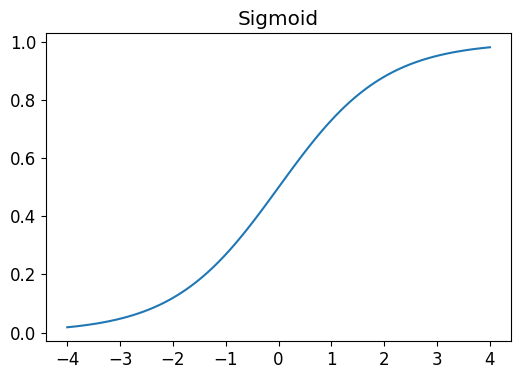

In [121]:
plot_function(torch.sigmoid,title='Sigmoid',min=-4,max=4)

In [122]:
def mnist_loss(predictions,targets):
    predictions = sigmoid(predictions)
    return torch.where(targets==1, 1-predictions, predictions).mean()

| 维度   | 损失函数(Loss) | 评估指标(Metric)
|------|------------| -----
| 作用   | 驱动模型优化（自动化学习) | 衡量模型真实性能（辅助人工决策)
| 数学特性 | 可导、平滑，对微小变化敏感           | 直观反应目标（如准确率、F1值）
| 计算方式 | 每个样本单独计算后取平均（Epoch 内累加） | 整个数据集或批次上直接统计（如正确预测比例）
| 关注阶段 | 训练过程中优化的目标 | 训练后评估模型的最终效果

#### 损失函数与评估指标的区别
损失函数是模型优化的 “引擎”，需满足数学可优化性；而评估指标是衡量模型价值的 “标尺”，反映真实业务目标。二者分离是深度学习的核心设计原则，理解这一差异对有效训练和评估模型至关重要。

## SGD and Mini-Batches

随机梯度下降中的小批量技术

实际应用优势
- 硬件加速适配：GPU 等加速器适合并行处理批量数据，小批量可充分利用其计算能力；但若批量过大，可能导致内存溢出。
- 数据增强与泛化：每轮训练前随机打乱数据集生成小批量，增加数据随机性，提升模型泛化能力（类似数据增强策略）。

In [123]:
coll = range(15)
dl = DataLoader(coll,batch_size=5,shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [124]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j'),(10, 'k'),(11, 'l'),(12, 'm'),(13, 'n'),(14, 'o'),(15, 'p'),(16, 'q'),(17, 'r'),(18, 's'),(19, 't')...]

当我们将数据集传递给 DataLoader 时，我们将返回小批量数据，这些小批量数据本身是张量的元组，代表独立变量和因变量的批量数据

In [125]:
dl = DataLoader(ds,batch_size=6,shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

## Putting it all together

It's time to implement the process we saw in <<gradient_descent>>. In code, our process will be implemented something like this for each epoch:

for x,y in dl:
    pred = model(x)
    loss = loss_func(pred, y)
    loss.backward()
    parameters -= parameters.grad * lr

In [127]:
# 重新初始化参数
weights = init_params((28*28,1)) #返回的是一个形状为 (784, 1) 的张量，其中每个元素是服从正态分布的随机值，且该张量被标记为可自动求导
bias = init_params(1) # 形状为 (1,) 的张量

In [128]:
# 从数据集创建DataLoader
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [129]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [130]:
# 创建一个 size 4的 最小批量
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [131]:
preds = linear1(batch)
preds

tensor([[18.9013],
        [12.2656],
        [10.8641],
        [16.3815]], grad_fn=<AddBackward0>)

In [132]:
loss = mnist_loss(preds,train_y[:4])
loss

tensor(5.9903e-06, grad_fn=<MeanBackward0>)

In [133]:
# 计算gradients
loss.backward()
weights.grad.shape, weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-8.5736e-07), tensor([-5.9816e-06]))

Let's put that al in a function

In [135]:
def calc_grad(xb,yb,model):
    preds = model(xb)
    loss=mnist_loss(preds,yb)
    loss.backward()

In [136]:
# test it
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-1.7147e-06), tensor([-1.1963e-05]))

In [137]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-2.5721e-06), tensor([-1.7945e-05]))

调用两次
梯度已经改变了！原因是 loss.backward 实际上把损失函数的梯度加到了当前存储的梯度上。所以，我们必须先把当前梯度设置为 0：

In [138]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

#### note: 就地操作：python中以下划线结尾的方法会就地修改其对象。例如，bias.zero_() 将张量 bias 的所有元素设置为0

In [139]:
# 这一时期的基本训练循环
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb,yb,model)
        for p in params:
            p.data -= p.grad * lr
            p.data.zero_()

In [140]:
(preds>0.0).float() == train_y[:4]

tensor([[True],
        [True],
        [True],
        [True]])

In [141]:
def batch_accuracy(xb,yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [142]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(1.)

In [143]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb),yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(),4)

In [144]:
validate_epoch(linear1)

0.5744

In [145]:
# that's our standing point. Let's train for one epoch, and see if the accuracy improves:
lr=1.
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.5068

In [146]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.5068 0.5068 0.5068 0.5068 0.5068 0.5068 0.5068 0.5068 0.5068 0.5068 0.5068 0.5068 0.5068 0.5068 0.5068 0.5068 0.5068 0.5068 0.5068 0.5068 

## Creating an Optimizer

In [147]:
linear_model = nn.Linear(28*28,1)

In [148]:
w,b=linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [149]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [150]:
opt = BasicOptim(linear_model.parameters(), lr)

In [151]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()


In [152]:
validate_epoch(linear_model)

0.6356

In [153]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [154]:
train_model(linear_model, 20)


0.4932 0.7847 0.8603 0.9184 0.936 0.9507 0.9575 0.9634 0.9663 0.9682 0.9692 0.9721 0.9736 0.9751 0.9761 0.9765 0.9775 0.978 0.9785 0.979 